# Data Mining Sample Project 
- Using the clustering techniques from Unsupervised Learning
- Citation: https://www.mygreatlearning.com/

## Intorduction:

1. Context
    - A clustering task that makes a comparison between Adidas and Nike sneakers products 

2. Objective
    - To perform an exploratory data analysis and cluster the products based on various factors
    - Extracting insights and opinion-mining from the dataset and answering the key questions  

3. Key Questions
    - Which variables are most important for clustering?
    - How each cluster is different from the others?
    - What are the business recommendations?

4. Data Description
    - **The dataset sneakers.csv**: Consists of 3268 products from Nike and Adidas with the following features: 

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

## Importing Libraries

In [1]:
# general libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# data visualization libraries  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# please uncomment and run the next line if yellowbrick library is not previously installed
#!pip install yellowbrick

## Loading Dataset

In [3]:
# loading the dataset
data = pd.read_csv("sneakers.csv")

In [4]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

## EDA 

### Basic Data Exploration

In [5]:
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [6]:
df.shape

(3268, 8)

* The dataset has 3268 rows and 8 columns 

In [7]:
# A DataFrame is a 2-D type of dataset since it contains rows and columns only.
# dimensionality reduction refers to reducing the number of the columns
# dimensionality reduction plays a significant role in data segmentation or clustering.
df.ndim

2

In [8]:
df.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [9]:
# let's check for duplicate observations
df.duplicated().sum()

88

Observation:
- There are 88 duplicated observations (rows). We will remove them from the data.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

### Advanced Data Analysis

In [12]:
# let's look at the data inforamtion 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3180 non-null   object 
 1   Product ID     3180 non-null   object 
 2   Listing Price  3180 non-null   int64  
 3   Sale Price     3180 non-null   int64  
 4   Discount       3180 non-null   int64  
 5   Brand          3180 non-null   object 
 6   Rating         3180 non-null   float64
 7   Reviews        3180 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 223.6+ KB


In [13]:
# let's get the statistical summary of the numeric values
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,6992.707547,6027.742767,27.619497,3.266635,41.529560
std,4677.133304,4192.481308,22.492385,1.393592,31.373989
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4599.000000,40.000000,3.500000,39.000000
75%,8999.000000,7995.000000,50.000000,4.400000,69.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


**Observations**

- 0 in the listing price indicates missing values.
- The average listing price is 6993.
- The average sale price is 6028.
- The average discount is 28%.
- The average rating is 3.3.
- The average number of reviews is 42.

In [14]:
# let's get a summary of the object variables
df.describe(include=['object']).T

,count,unique,top,freq
Product Name,3180,1531,Women's adidas Originals Sambarose Shoes,16
Product ID,3180,3179,CI2668-004,2
Brand,3180,5,Adidas CORE / NEO,1111


In [15]:
# fixing column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [16]:
df.head()

,Product_Name,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [17]:
# I can either convert the dtype one variable at a time
df['Product_Name'] = df['Product_Name'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product_Name   3180 non-null   category
 1   Product_ID     3180 non-null   object  
 2   Listing_Price  3180 non-null   int64   
 3   Sale_Price     3180 non-null   int64   
 4   Discount       3180 non-null   int64   
 5   Brand          3180 non-null   object  
 6   Rating         3180 non-null   float64 
 7   Reviews        3180 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 249.2+ KB


In [19]:
# or I can store all the object variables in one container
cols = df.select_dtypes(['object'])

In [20]:
# now, these are variables with object dtype 
cols.columns

Index(['Product_ID', 'Brand'], dtype='object')

In [21]:
# let's convert all the remaining object to category dtypes
cols = cols.astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product_Name   3180 non-null   category
 1   Product_ID     3180 non-null   object  
 2   Listing_Price  3180 non-null   int64   
 3   Sale_Price     3180 non-null   int64   
 4   Discount       3180 non-null   int64   
 5   Brand          3180 non-null   object  
 6   Rating         3180 non-null   float64 
 7   Reviews        3180 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 249.2+ KB


In [23]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product_Name   3180 non-null   category
 1   Product_ID     3180 non-null   category
 2   Listing_Price  3180 non-null   int64   
 3   Sale_Price     3180 non-null   int64   
 4   Discount       3180 non-null   int64   
 5   Brand          3180 non-null   category
 6   Rating         3180 non-null   float64 
 7   Reviews        3180 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 362.9 KB


In [25]:
df.describe(include=['category']).T

,count,unique,top,freq
Product_Name,3180,1531,Men's adidas Originals Supercourt Shoes,16
Product_ID,3180,3179,CI2668-004,2
Brand,3180,5,Adidas CORE / NEO,1111


**We won't need Product_ID for analysis, so let's drop this column.**

In [26]:
df.drop('Product_ID', axis=1, inplace=True)

In [27]:
df.head()

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,3.5,72


Observation:

* As we saw, the min for the Listing_Price was zero, that can't be zero price,
* Zero is a missing value in this dataset
* Let's examine the Listing_Price feature to see whether there is more zero prices

In [28]:
# there some products in this dataset with 0 as their listing prices
# let's check how many products have listing price of 0
(df.Listing_Price == 0).sum()

362

In [29]:
# let's get the statistical summary for the products with 0 as their listing price
df.Listing_Price.describe()

count     3180.000000
mean      6992.707547
std       4677.133304
min          0.000000
25%       4599.000000
50%       5999.000000
75%       8999.000000
max      29999.000000
Name: Listing_Price, dtype: float64

In [30]:
# let's check the products which have listing price 0
df[(df.Listing_Price == 0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


- There are 336 observations that have missing values in the listing price column
- And also, the discount for the products with zero listing price is 0, too.
- So, we will replace the listing price with the corresponding sale price for those observations.

In [31]:
# checking missing values
df.isna().sum()

Product_Name     0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

- There are no missing values in this dataset.

#### Univariate EDA

**Brand Variable**

In [32]:
# let's see the different categories in the Brand variable 
df['Brand'].value_counts()

Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Adidas SPORT PERFORMANCE     606
Nike                         555
Adidas Adidas ORIGINALS        1
Name: Brand, dtype: int64

In [33]:
# let's fix the the first one
df['Brand'] = df['Brand'].replace('Adidas Adidas ORIGINALS', 'Adidas ORIGINALS')

In [34]:
# let's check again
df['Brand'].value_counts()

Adidas CORE / NEO           1111
Adidas ORIGINALS             908
Adidas SPORT PERFORMANCE     606
Nike                         555
Name: Brand, dtype: int64

#### Indexers:

1. loc: accessing values by their location for object dtypes
2. iloc: accessing values by their location for integer dtypes

**Reviews Variable**

In [35]:
# let's examine the Reviews variable using loc indexter 
df1 = df.loc[:, 'Listing_Price':'Reviews']

In [36]:
# let's see the first 10 highest reviews
df1.sort_values(by='Reviews', ascending=False).head(10)

,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2750,0,15995,0,Nike,4.7,223
2805,0,14495,0,Nike,4.3,105
2166,6999,4199,40,Adidas ORIGINALS,4.5,99
723,5999,3599,40,Adidas CORE / NEO,4.6,99
667,4999,2000,60,Adidas CORE / NEO,2.9,99
1568,7599,7599,0,Adidas ORIGINALS,1.0,99
89,5299,2649,50,Adidas CORE / NEO,2.4,99
1149,7999,4799,40,Adidas ORIGINALS,4.0,99
560,4999,2499,50,Adidas SPORT PERFORMANCE,2.4,99
1274,5999,5999,0,Adidas CORE / NEO,3.1,99


**Rating Variable**

In [37]:
# sort the head(10) by rating decending from 5 to 1
df1.sort_values(by="Rating", ascending=False).head(10)

,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
1039,5999,4199,30,Adidas CORE / NEO,5.0,96
2976,11995,7197,0,Nike,5.0,1
2488,10999,10999,0,Adidas ORIGINALS,5.0,32
2966,15995,11197,0,Nike,5.0,4
2965,0,8995,0,Nike,5.0,6
1487,4999,2499,50,Adidas CORE / NEO,5.0,33
2960,0,8995,0,Nike,5.0,1
221,4599,2299,50,Adidas CORE / NEO,5.0,61
595,3799,1899,50,Adidas CORE / NEO,5.0,65
2954,0,12995,0,Nike,5.0,1


#### Multivariate EDA & Visualization

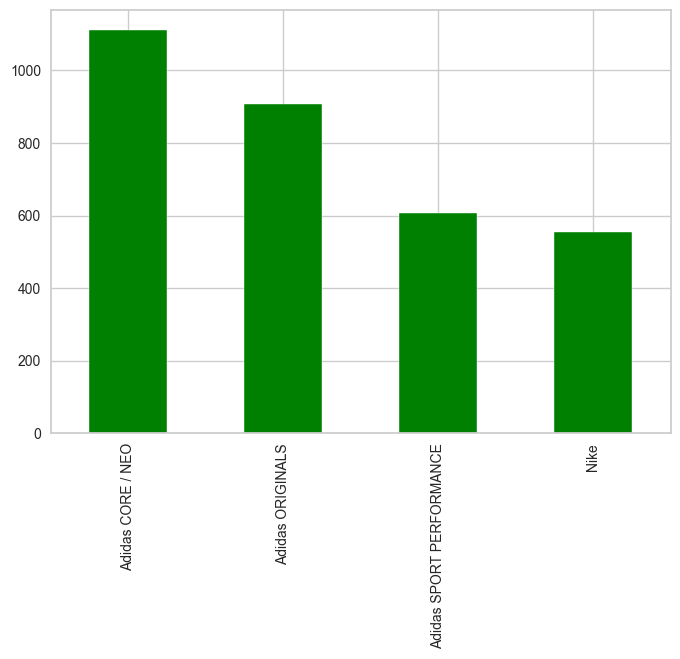

In [38]:
df['Brand'].value_counts().plot(kind='bar', color='green');

In [39]:
# first let's groupby the brands 
brands_grouped = df.groupby(df['Brand'])

In [40]:
# then, let's get the averages (mean)
avg_dis = brands_grouped.mean()

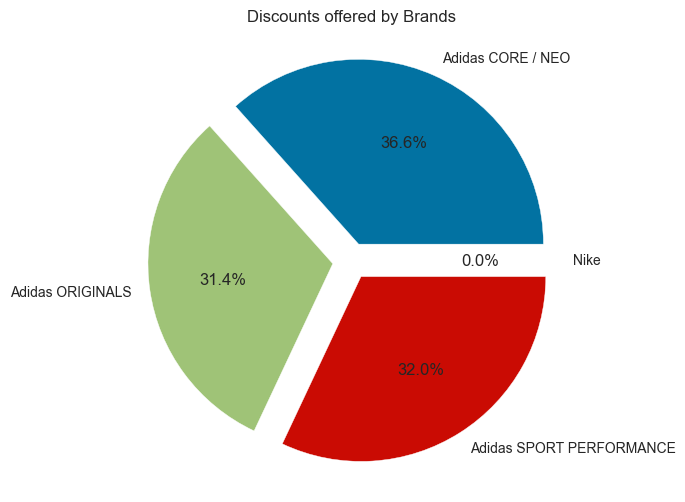

In [41]:
# then, let's get a pie chart to show the discount percentage by each brand
plt.subplots(figsize = (10, 6))
discount = np.array(avg_dis.Discount)
label = avg_dis.index
plt.pie(x = discount, autopct = '%.1f%%', explode=[0.10] * 4, labels = label)
plt.title('Discounts offered by Brands');

* As we can see, Nike is not offering any discount. 

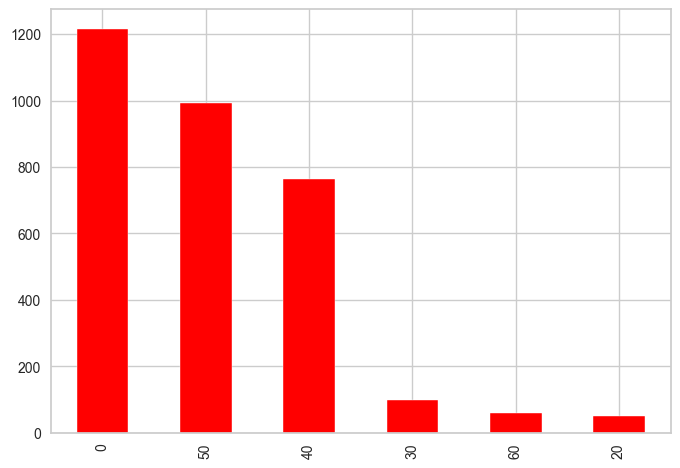

In [42]:
df['Discount'].value_counts().plot(kind='bar', color='red');            

In [43]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

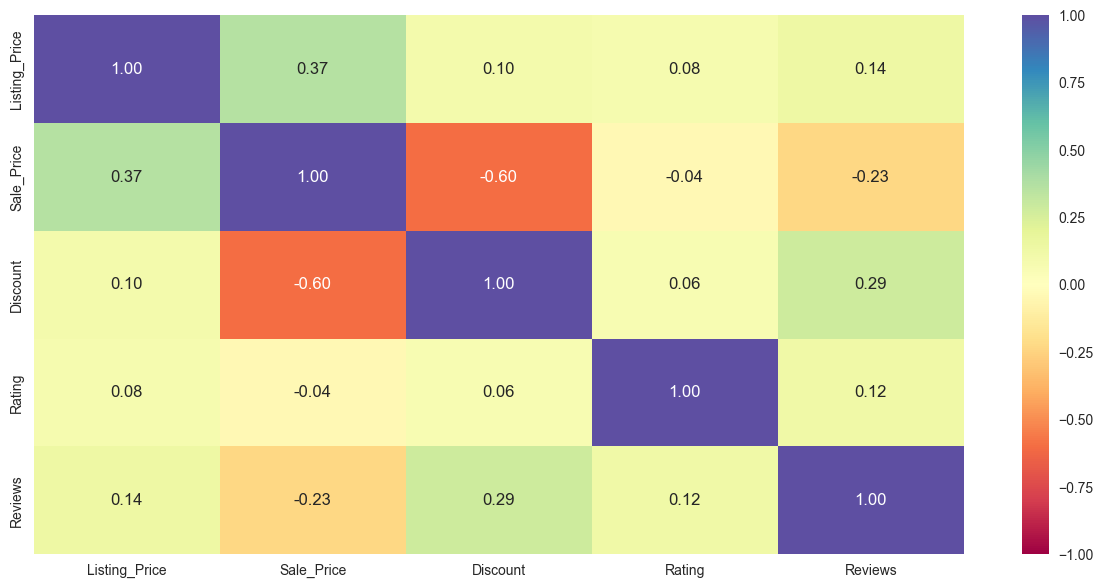

In [44]:
# Let's check for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- The sale price and the listing price are highly positively correlated, which is obvious.
- Discount is somewhat negatively correlated with listing price or sale price, which indicates that expensive products either have fewer discounts or no discounts at all.

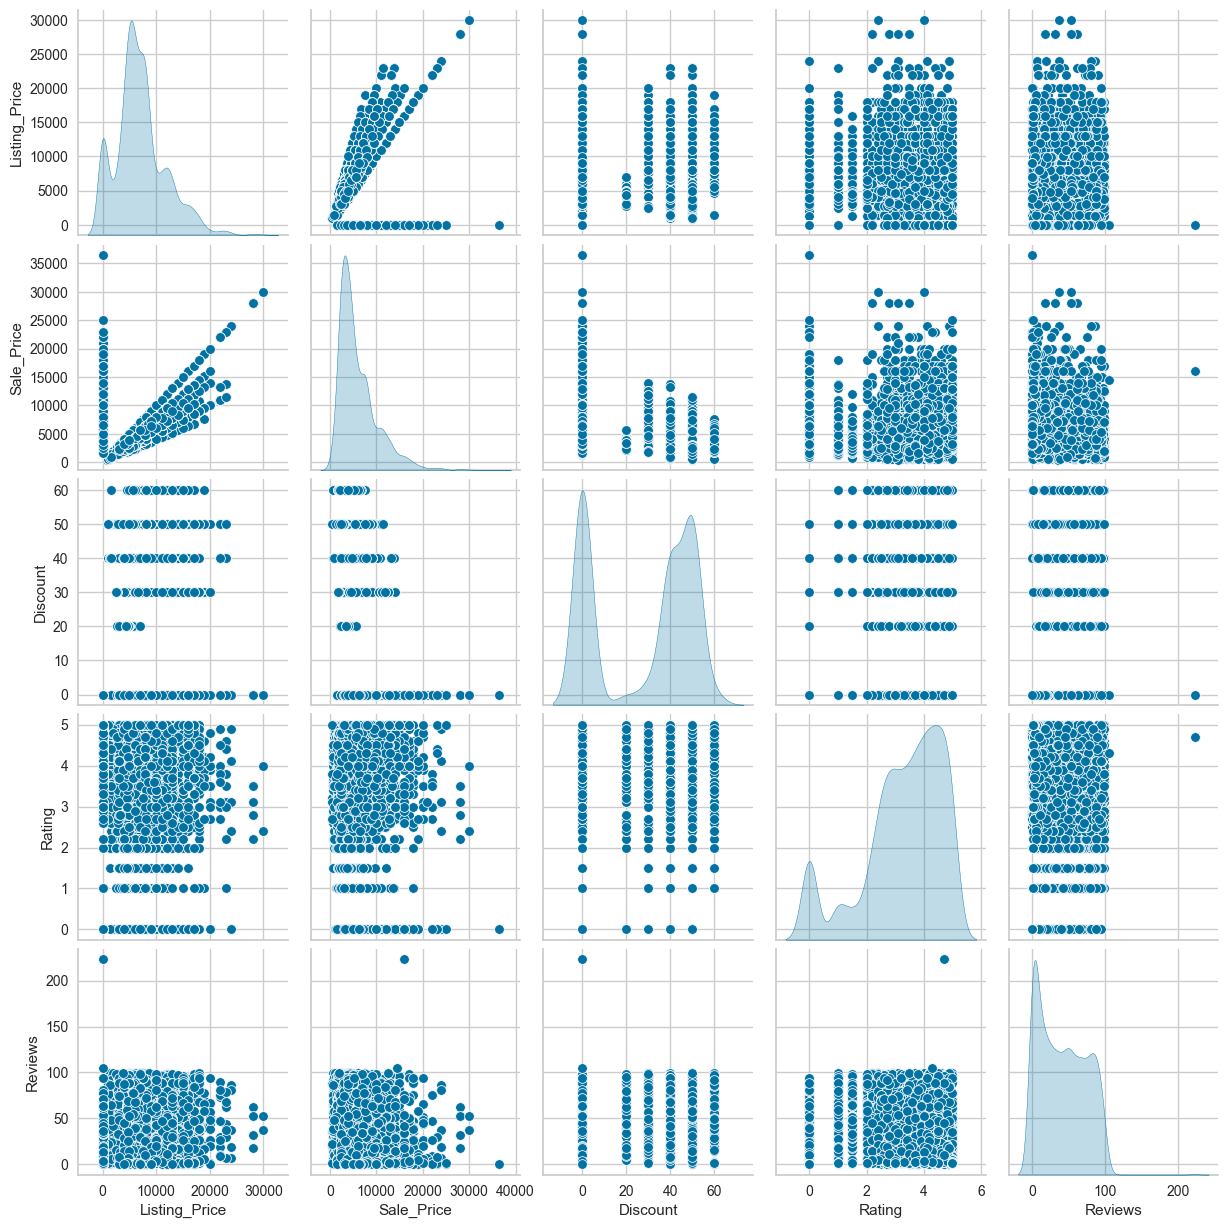

In [45]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

- 50-60% discounts are mostly given to products whose listing price is 10,000 or less.
- Many products have no discount.
- As seen before, most of the products have 100 or fewer reviews.
- As seen in the corr heatmap, listing price and sale price have positive correlation.  

### End of Part 1 of the Sample Practice.

## Model Building

- Before building the k-means clustering model, we need to perform data-processing to prepare data to be fed into the model. 

### Data Preprocessing

In [46]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [47]:
# 1st, we need to choose variables that will be used in clustering
# num_col stores numerical columns
num_col

['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']

In [48]:
# 2nd, scaling is almost needed in any clustering project before performing clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [49]:
# 3rd, creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

### K-means Clustering

1. Finding the best value for K
2. Running the model using the best value of K
3. Creating cluster profiling  

###  Elbow Method for finding the best value for K

In [50]:
clusters = range(1, 9)
# creating 8 clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )  # cdist calculate the minimum distance using euclidena measure between data points and centroid in
        # every cluster and with the centroid of the neighboring cluster
        / subset_scaled_df.shape[0]
    )

    # distorion in k-means is defined as the sum of the squared distances between
    # each data point and the centroid within a cluster. The k-means method tries to minimize the distorion.
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.0883335739691726
Number of Clusters: 2 	Average Distortion: 1.7324644202003066
Number of Clusters: 3 	Average Distortion: 1.6036970377969222
Number of Clusters: 4 	Average Distortion: 1.4894817288761235
Number of Clusters: 5 	Average Distortion: 1.3533298223084755
Number of Clusters: 6 	Average Distortion: 1.2718315621900027
Number of Clusters: 7 	Average Distortion: 1.2045674262113086
Number of Clusters: 8 	Average Distortion: 1.1433927111700977


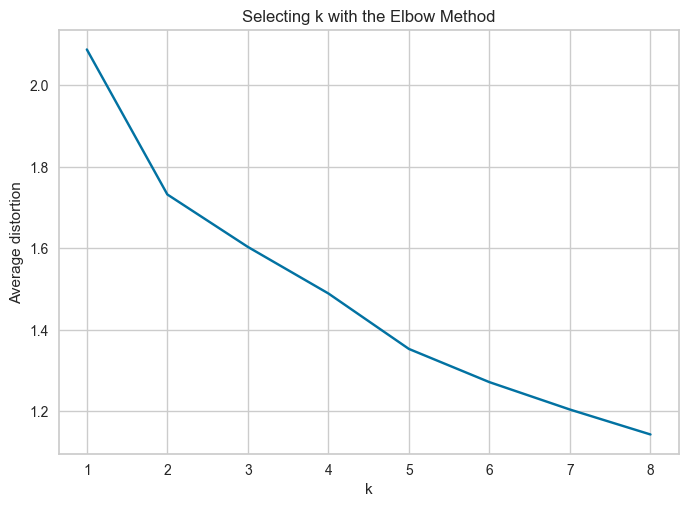

In [51]:
# plotting the elbow method: a way of choosing a value for k = number of clusters
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Examining the value of k from the Elbow plot: Although the elbow method can be confusing, we can back it up with the KElbow Visualizer.** 
* Appropriate value for k seems to be 3 or 4.

### Using the KElbow Visualizer to find the best value for K 
* The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for . If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
citation: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html 

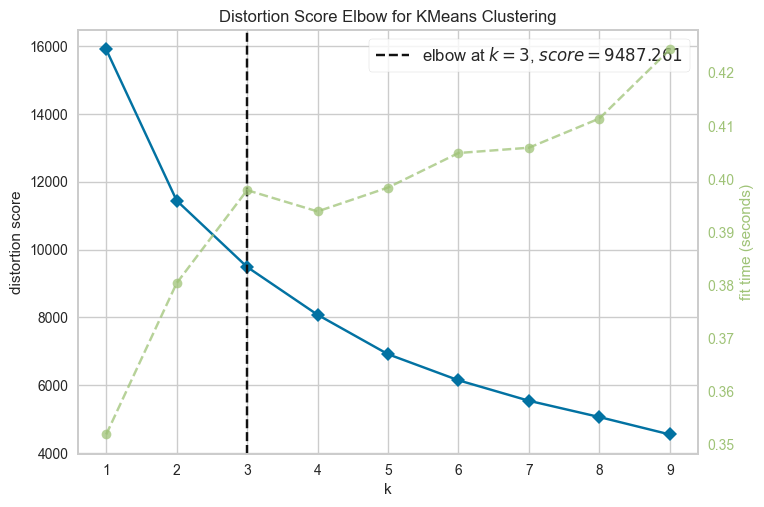

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# let's check out the KElbow Visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

* Appropriate value for k seems to be 4 based on the KElbow KMean Clustering plot.  

### Checking the silhouette scores to find the best value for K 
* The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.
citation: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

For n_clusters = 2, the silhouette score is 0.3153890551185851)
For n_clusters = 3, the silhouette score is 0.31745366052729046)
For n_clusters = 4, the silhouette score is 0.32416196508827066)
For n_clusters = 5, the silhouette score is 0.2620616705337699)
For n_clusters = 6, the silhouette score is 0.28078019362312145)
For n_clusters = 7, the silhouette score is 0.2880566983764498)
For n_clusters = 8, the silhouette score is 0.28789364527460554)
For n_clusters = 9, the silhouette score is 0.29286288630296037)


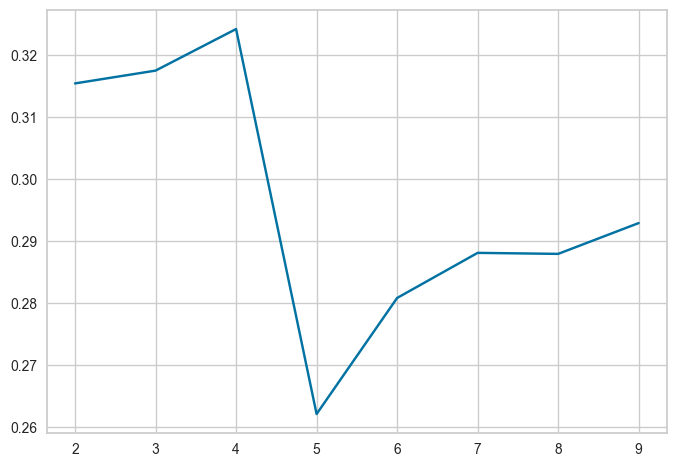

In [53]:
# let's check the silhouette visualizer out
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 4 is higher than that for 3. So, we will choose 4 as value of k.**

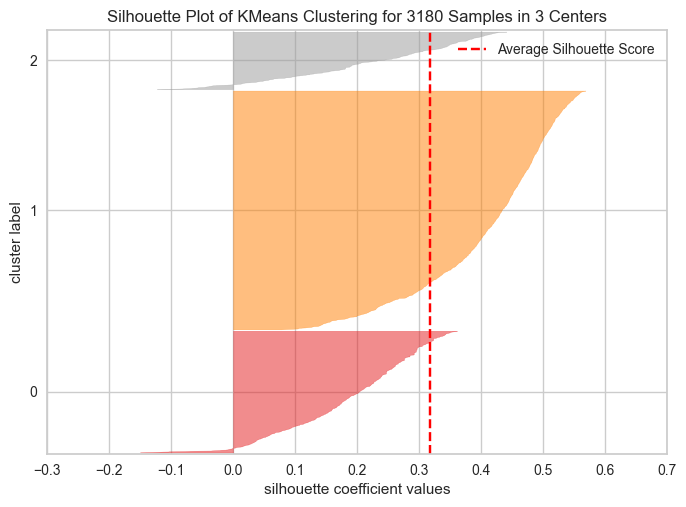

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3180 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

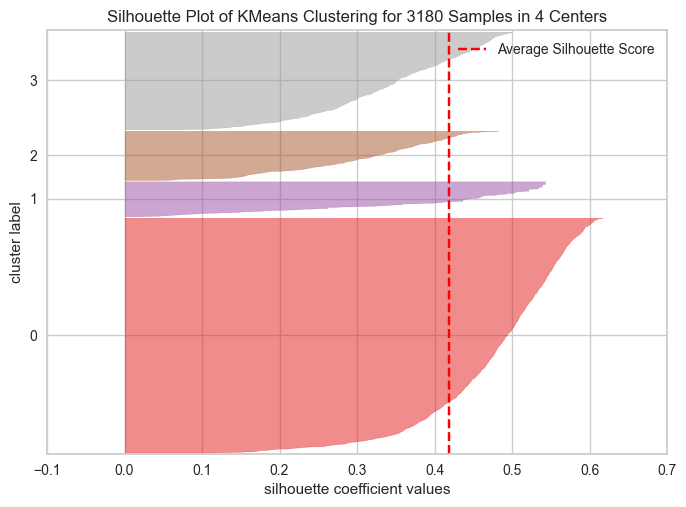

In [65]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

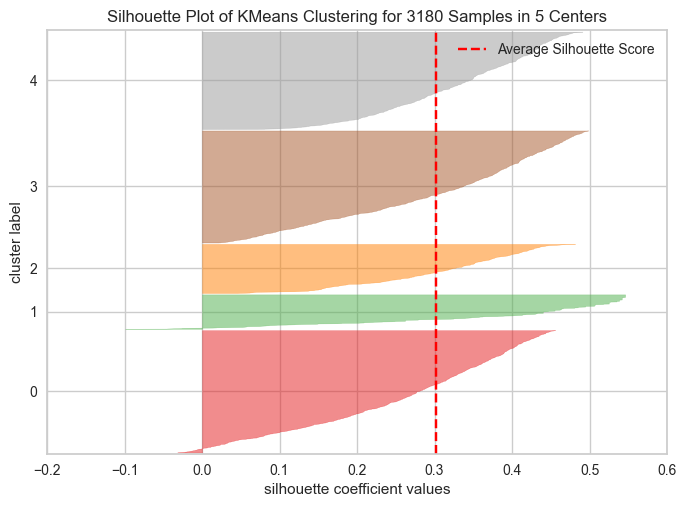

In [66]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

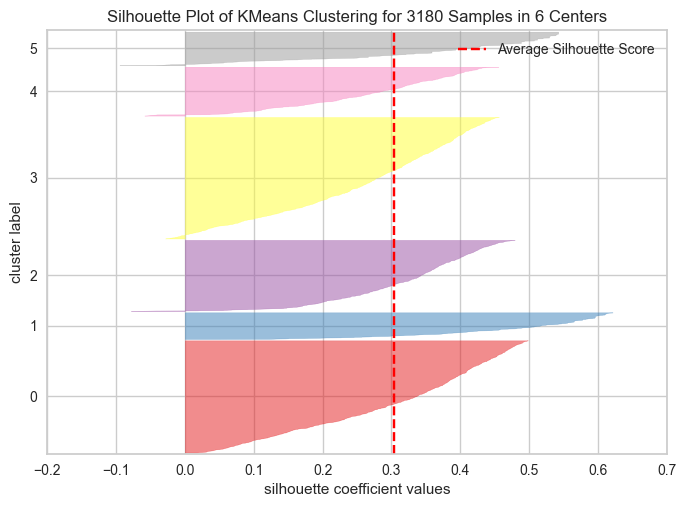

In [67]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

### Running the model using the best value of K

In [58]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [59]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [60]:
# adding kmeans cluster labels to the original dataframe
cluster_profile = df.groupby("K_means_segments").mean()

In [61]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Sale_Price"].count().values
)

In [62]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
K_means_segments,,,,,,
0,6737.860972,3659.474595,45.321050,3.358738,50.123395,1791
1,4108.808989,8922.524345,3.970037,0.186891,8.011236,267
2,4392.639410,7505.718499,0.549598,3.915550,34.072386,746
3,15413.138298,12320.539894,13.803191,3.727394,39.191489,376


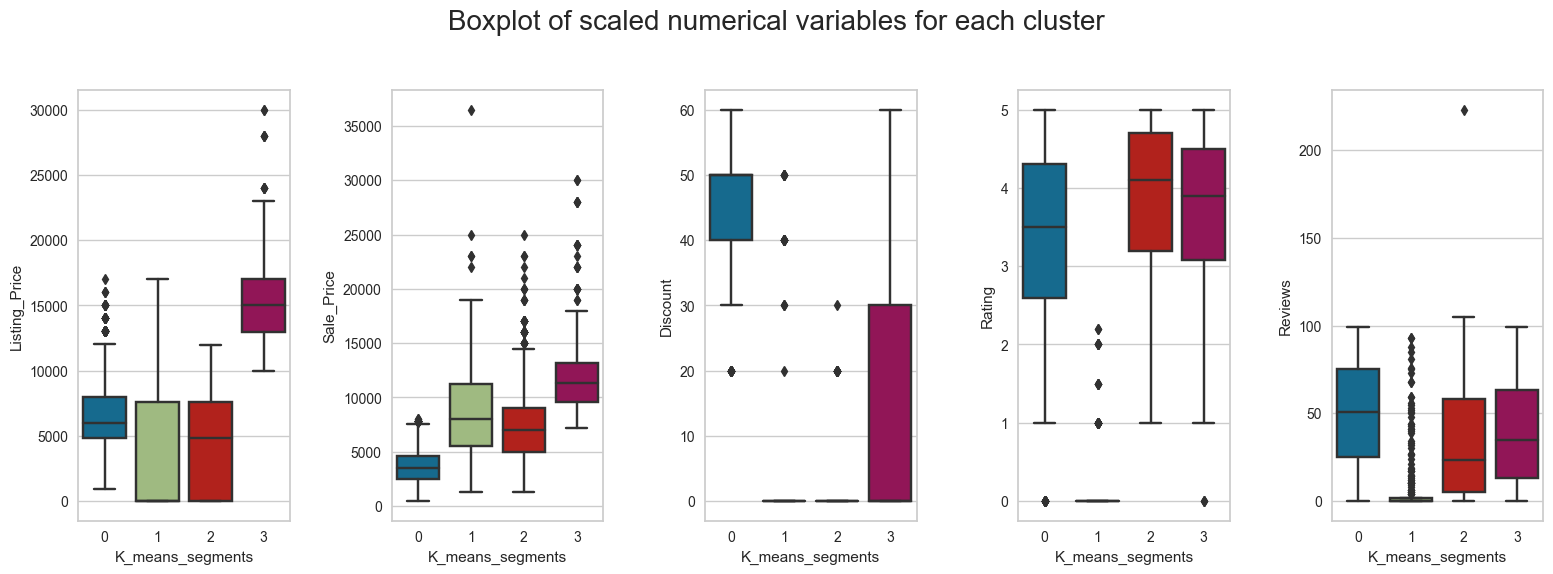

In [63]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=df[num_col[counter]],
        x=df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights for each cluster

- **Cluster 0**:
    - This cluster contains more expensive premium products, with an average listing price of approximately 15500.
    - Almost no discount is given to products in this cluster.
    - The median rating of this cluster is around 0 suggesting that customers are not very satisfied with the products in this cluster.
    - Products in these clusters have got lesser reviews, which can be because these products are very expensive and fewer people buy them.
   
- **Cluster 1**:
    - Listing price is low for products in this cluster, and the sale price is lower, as there are heavier discounts on these products.
    - 50% of the products have discounts between 30% to 40%.
    - More than 50% of products have a rating from 2.5 to 4.5 which indicates that customer satisfaction varies across products in this cluster.
    - On average, 50 reviews are given to products in this cluster.
    
- **Cluster 2**:
    - The listing price of products in this cluster is similar to those in Cluster 1, but the sale price is comparatively lower than Cluster 1.
    - 10% of the products have discounts between 40% to 50%.
    - The median rating is from 3.5 to 4.3 in this cluster.
    - On average, 30 reviews are given to products in this cluster.


- **Cluster 3**:
    - Listing and sale price of products in this cluster are higher than any other clusters.
    - Almost no discount is given to products in this cluster.
    - Products in this cluster have the highest rating median.
    - On average, 50 reviews are given to products in this cluster.

**Let's compare Cluster vs Brand**

In [68]:
pd.crosstab(df.K_means_segments, df.Brand).style.highlight_max(color="lightgreen", axis=0)

Brand,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,
0,874,560,357,0
1,16,34,18,199
2,221,151,89,285
3,0,163,142,71


**Observations**

- Adidas gives more discounts on their products, while Nike barely gives any.
- Nearly one-third of Nike products are premium in nature.

## Conclusion

- Cluster 0 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.
- Cluster 0 products can also be made available in showrooms situated in premium locations because people generally tend to buy premium products from showrooms.
- Cluster 1 consists of products that are sold at higher discounts, so these might be the ones that are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.
- Cluster 2 and 3 consists of products with comparatively low and medium prices with almost no discount, so general marketing campaigns can be done for these to target the general public.